In [1]:
# Data downloaded from 10.5281/zenodo.13823014

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import h5py
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density # needed for density scatter plots
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# COLORS:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#440053"),
    (0.2, "#404388"),
    (0.4, "#2a788e"),
    (0.6, "#21a784"),
    (0.8, "#78d151"),
    (1, "#fde624"),
], N=256)
# "Viridis-like" colormap with white background
white_viridis_r = LinearSegmentedColormap.from_list("white_viridis", [
    (0, "#ffffff"),
    (1e-20, "#fde624"),
    (0.4, "#78d151"),
    (0.6, "#21a784"),
    (0.7, "#2a788e"),
    (0.8, "#404388"),
    (1, "#440053"),
], N=256)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [3]:
# LOAD DATA

jsd = {5: [], 10: [], 15: [], 20: [], 30: []}
track_pearson = {
    5: [0.4892, 0.5622, 0.4327, 0.4400, 0.4627],
    10: [0.6457, 0.5973, 0.6407, 0.6578, 0.6422],
    15: [0.7119, 0.7090, 0.6961, 0.6959, 0.7146],
    20: [0.7146, 0.7217, 0.7076, 0.7225, 0.7175],
    30: [0.7489, 0.7473, 0.7441, 0.7334, 0.7344],
}
quantity_log_pearson = {
    5: [0.7010, 0.7070, 0.6032, 0.5962, 0.6722],
    10: [0.7213, 0.7170, 0.7213, 0.7274, 0.7192],
    15: [0.7285, 0.7284, 0.7244, 0.7262, 0.7302],
    20: [0.7264, 0.7308, 0.7281, 0.7310, 0.7261],
    30: [0.7311, 0.7398, 0.7382, 0.7336, 0.7297],
}

In [4]:
jsd_df = pd.DataFrame(jsd).melt()
jsd_df.columns = ["n", "JSD"]

track_pearson_df = pd.DataFrame(track_pearson).melt()
track_pearson_df.columns = ["n", "Track Pearson"]

quantity_log_pearson_df = pd.DataFrame(quantity_log_pearson).melt()
quantity_log_pearson_df.columns = ["n", "Quantity Log Pearson"]

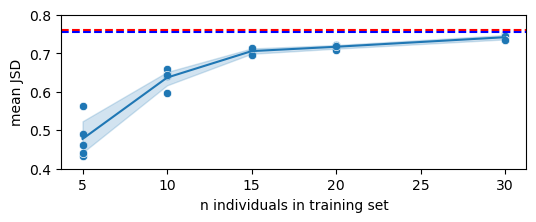

In [8]:
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(data=track_pearson_df, x="n", y="Track Pearson")
sns.lineplot(data=track_pearson_df, x="n", y="Track Pearson")
plt.axhline(0.761, color="red", linestyle="--")
plt.axhline(0.7538786780682871, color="blue", linestyle="--")
#plt.axhline(0.3509571345224863, color="black")
ax.set_ylim(0.4, 0.8)

ax.set_xlabel("n individuals in training set")
ax.set_ylabel("mean JSD")
plt.savefig("img/clipnet_profile_predictions.pdf")

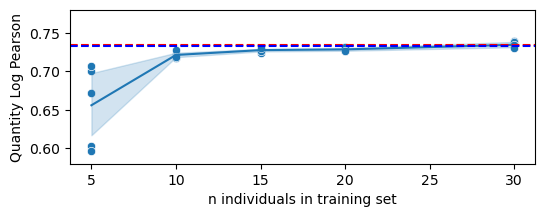

In [7]:
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(data=quantity_log_pearson_df, x="n", y="Quantity Log Pearson", ax=ax)
sns.lineplot(data=quantity_log_pearson_df, x="n", y="Quantity Log Pearson", ax=ax)
plt.axhline(0.734, color="red", linestyle="--")
plt.axhline(0.7325659, color="blue", linestyle="--")
ax.set_ylim(0.58, 0.78)

ax.set_xlabel("n individuals in training set")
#ax.set_ylabel("mean Pearson correlation")
plt.savefig("img/clipnet_pearson_log_quantity_predictions.pdf")

In [14]:
spearmanr(jsd_df["n"], jsd_df["JSD"])

SignificanceResult(statistic=-0.9766583529881566, pvalue=7.286240776157704e-17)

In [11]:
spearmanr(
    track_pearson_df["n"].to_list() + [58],
    track_pearson_df["Track Pearson"].to_list() + [0.790]
)

SignificanceResult(statistic=0.9707475274647157, pvalue=2.23209143625425e-16)

In [18]:
spearmanr(
    quantity_log_pearson_df["n"].to_list() + [58],
    quantity_log_pearson_df["Quantity Log Pearson"].to_list() + [0.734],
)

SignificanceResult(statistic=0.9091624692707175, pvalue=1.301747669083675e-10)